In [ ]:
# Step 1: Setup & Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Show plots inline
%matplotlib inline

# New Section

In [ ]:
#Step 2: Load the Dataset
# Alternative with raw string
df = pd.read_csv('tested.csv')
# Ensure the CSV file is in your working directory
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Step 3: Data Cleaning
#Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# Handle missing values
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Step 4: Summary Statistics
df.describe()
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


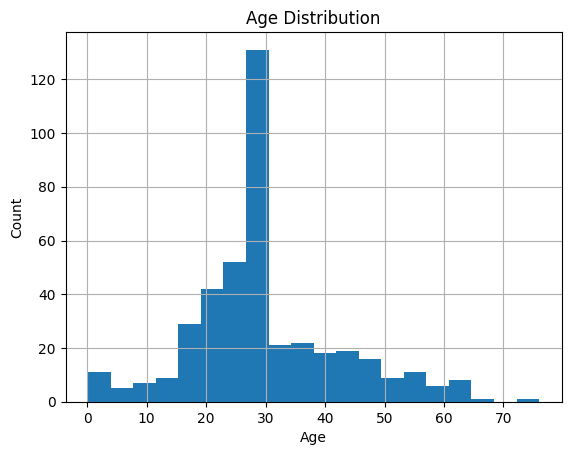

In [ ]:
#Step 5: Visualization
#Histogram
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

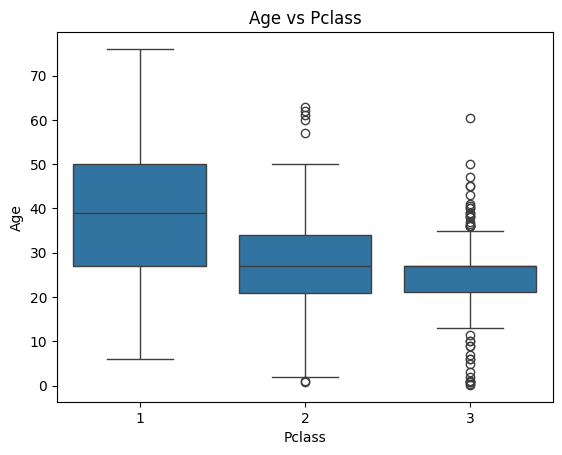

In [ ]:
#Box plot
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age vs Pclass')
plt.show()

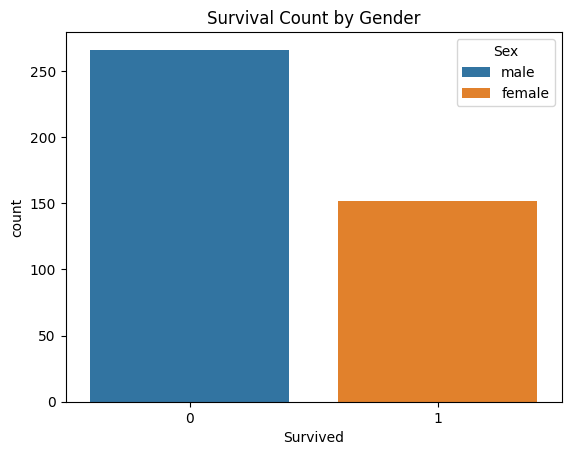

In [ ]:
#Count plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

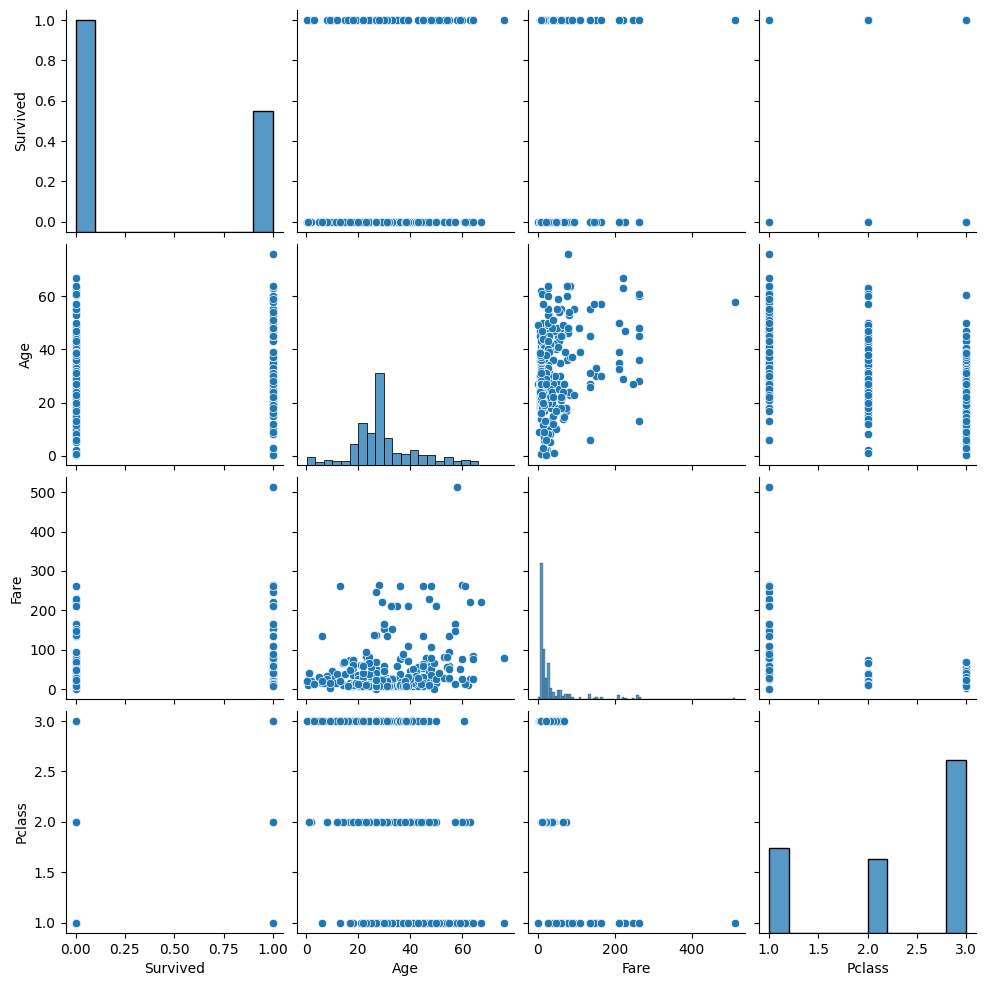

In [ ]:
#Step 6: Pair Plot & Correlation
#Pair plot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']])

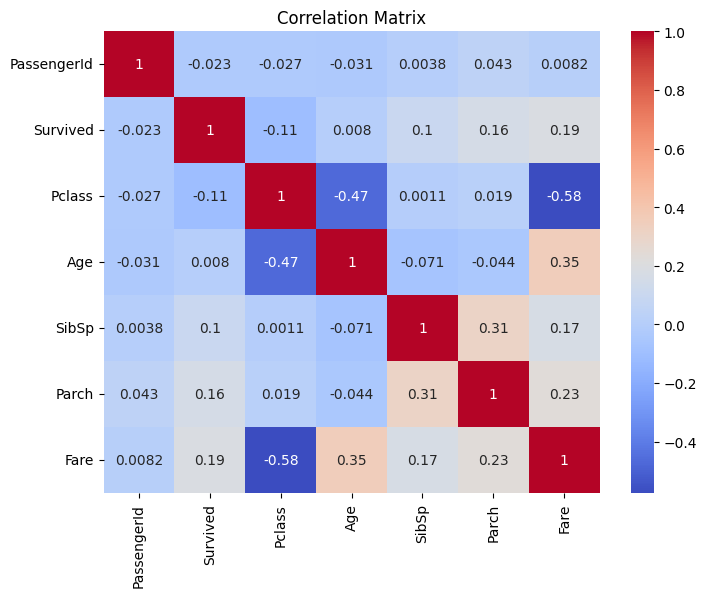

In [ ]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Step 7: GroupBy Analysis
# Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean())

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


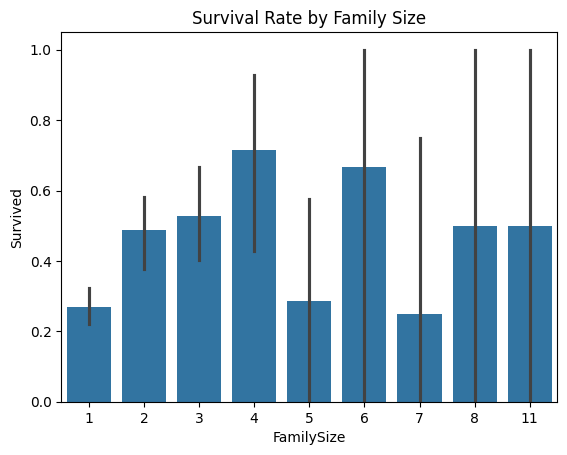

In [ ]:
#Bonus Step: Feature Engineering
#Create 'FamilySize' = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

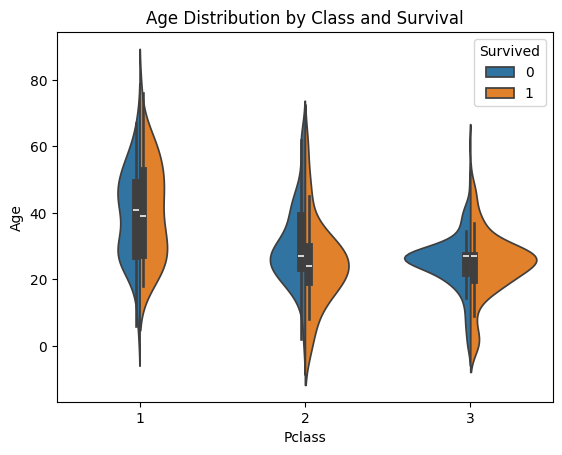

In [ ]:
#Bonus Visualization: Violin Plot
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()